<a href="https://colab.research.google.com/github/naiyajpatel/Kaggle-Project---Average-daily-screen-time-of-children/blob/main/Avg_daily_screen_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview:

This project analyzes a dataset of children aged 5 to 15 years, sourced from Kaggle. The dataset contains five key attributes:

Age: Age of the children. Gender: Categorized as 'Male', 'Female', or 'Other/Prefer not to say'. Screen Time Type: Defines whether screen time is for 'Educational', 'Recreational', or 'Total' usage. Day Type: Specifies whether the screen time was recorded on 'Weekdays' or 'Weekends'. Average Screen Time (hours): The average time children spend on screens. Sample Size: The total number of children in each category.

Objective:

The goal of this analysis is to:

Identify which age group has the highest screen time. Determine which gender spends the most time on screens. Analyze the primary purpose of screen usage (educational vs. recreational). Assess who is more prone to excessive screen time based on age, gender, and day type. This study aims to provide valuable insights into children's screen habits, helping to understand patterns and potential areas for improvement in screen time management.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing data file
path = '/content/drive/MyDrive/screen_time.csv'
data = pd.read_csv(path)

In [50]:
# first five rows of data
data.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [6]:
# last five rows of data
data.tail()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
193,15,Other/Prefer not to say,Recreational,Weekday,5.16,300
194,15,Other/Prefer not to say,Total,Weekday,6.50,300
195,15,Other/Prefer not to say,Educational,Weekend,2.19,300
196,15,Other/Prefer not to say,Recreational,Weekend,5.77,300
197,15,Other/Prefer not to say,Total,Weekend,7.96,300


In [7]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [8]:
# checking null values
data.isnull().sum()

,0
Age,0
Gender,0
Screen Time Type,0
Day Type,0
Average Screen Time (hours),0
Sample Size,0


In [9]:
# shape of data
data.shape

(198, 6)

In [24]:
data.describe()

,Age,Average Screen Time (hours),Sample Size
count,198.000000,198.000000,198.000000
mean,10.000000,2.993030,400.000000
std,3.170294,1.922822,63.405872
min,5.000000,0.440000,300.000000
25%,7.000000,1.402500,340.000000
50%,10.000000,2.490000,400.000000
75%,13.000000,4.397500,460.000000
max,15.000000,8.190000,500.000000


In [20]:
data['Age'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [19]:
data['Gender'].unique()

array(['Male', 'Female', 'Other/Prefer not to say'], dtype=object)

In [18]:
# Unique values
data['Screen Time Type'].unique()

array(['Educational', 'Recreational', 'Total'], dtype=object)

In [21]:
data['Average Screen Time (hours)'].unique()

array([0.44, 1.11, 1.55, 0.5 , 1.44, 1.93, 0.49, 0.96, 1.45, 1.4 , 1.9 ,
       0.52, 0.98, 1.5 , 1.51, 1.95, 0.64, 1.39, 2.02, 0.74, 1.75, 2.49,
       0.57, 1.37, 0.83, 1.63, 2.46, 0.59, 1.41, 2.  , 0.58, 1.91, 0.8 ,
       2.55, 1.08, 2.14, 3.22, 0.81, 1.61, 2.42, 0.66, 2.53, 3.19, 0.76,
       1.74, 2.5 , 0.75, 2.28, 3.02, 0.85, 2.18, 3.03, 1.29, 2.57, 3.86,
       0.93, 2.95, 1.  , 2.61, 3.62, 0.97, 2.03, 3.  , 0.91, 2.98, 3.89,
       0.73, 2.9 , 3.63, 3.52, 4.46, 1.12, 2.26, 3.39, 1.26, 2.94, 4.19,
       0.79, 2.71, 3.5 , 1.33, 2.99, 4.32, 1.07, 2.97, 4.05, 3.55, 5.29,
       0.94, 2.93, 3.87, 1.09, 4.72, 3.04, 4.  , 1.73, 3.38, 5.11, 3.21,
       4.55, 1.48, 4.4 , 5.89, 1.53, 2.86, 4.39, 4.11, 5.44, 4.5 , 1.86,
       3.75, 5.61, 1.22, 3.94, 5.15, 1.47, 4.95, 6.42, 1.36, 4.88, 2.01,
       3.81, 5.82, 1.27, 3.73, 5.  , 1.69, 4.47, 6.16, 1.18, 4.41, 5.59,
       1.62, 5.31, 6.93, 5.36, 5.19, 6.6 , 4.1 , 5.5 , 5.45, 7.08, 4.25,
       6.19, 1.72, 6.07, 7.79, 1.81, 5.81, 2.1 , 7.

In [22]:
data['Sample Size'].unique()

array([500, 480, 460, 440, 420, 400, 380, 360, 340, 320, 300])

In [23]:
data['Day Type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

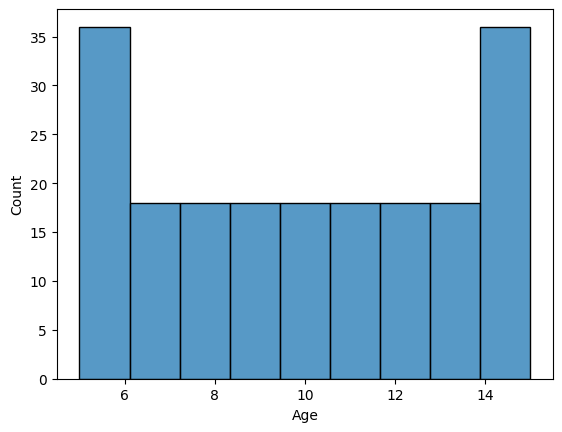

In [13]:
# Univariate analysis
sns.histplot(data=data, x='Age');

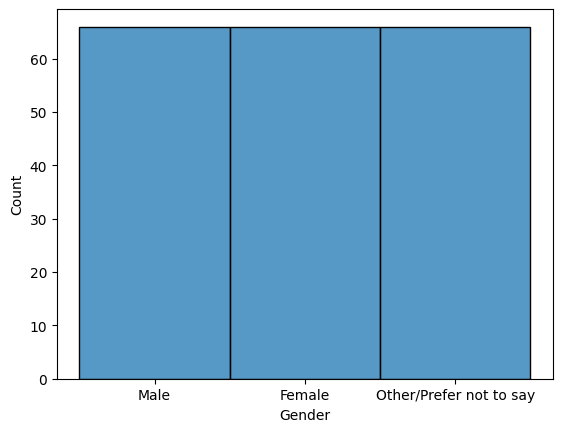

In [14]:
sns.histplot(data=data, x='Gender');

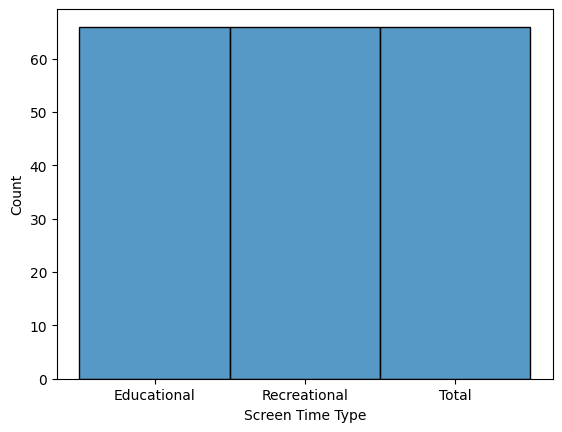

In [17]:
sns.histplot(data=data, x='Screen Time Type');

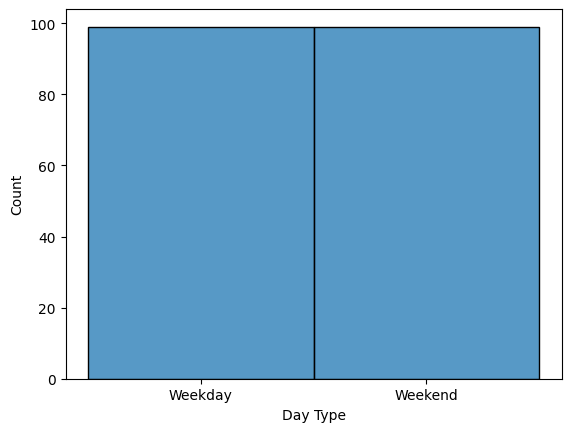

In [25]:
sns.histplot(data=data, x='Day Type');

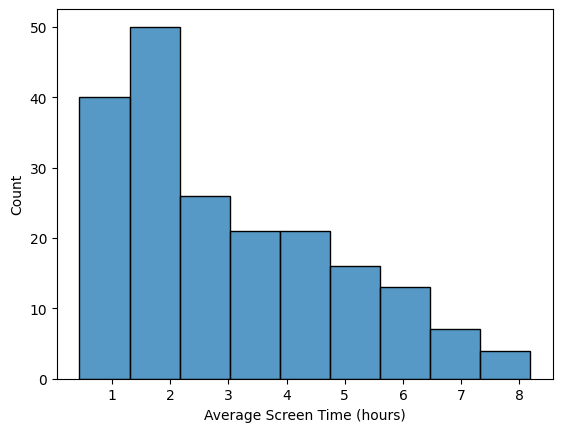

In [26]:
sns.histplot(data=data, x='Average Screen Time (hours)');

<Axes: xlabel='Average Screen Time (hours)'>

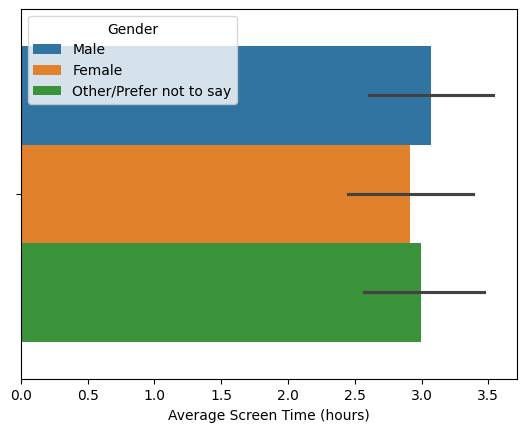

In [27]:
# Bivariate Analysis
sns.barplot(data=data, x='Average Screen Time (hours)', hue='Gender')

In [31]:
data.groupby('Gender')['Average Screen Time (hours)'].sum().value_counts(normalize=True)

,proportion
Average Screen Time (hours),
192.42,0.333333
202.62,0.333333
197.58,0.333333


Shows, Female screen time is 10% less than male and others screen time is 5% less than male overall

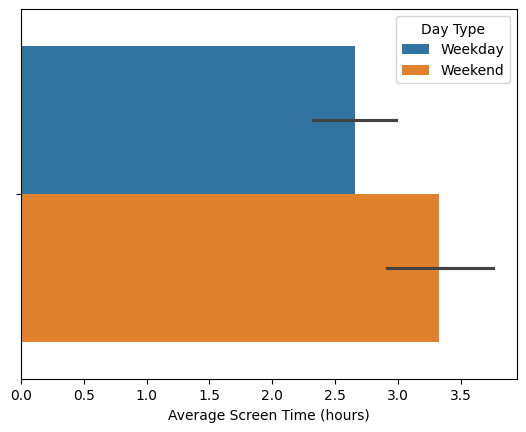

In [32]:
sns.barplot(data=data, x='Average Screen Time (hours)', hue='Day Type');

In [33]:
data.groupby('Day Type')['Average Screen Time (hours)'].sum().value_counts(normalize=True)

,proportion
Average Screen Time (hours),
263.45,0.5
329.17,0.5


Shows, 20% increase in screen time on weekends compared to weekdays

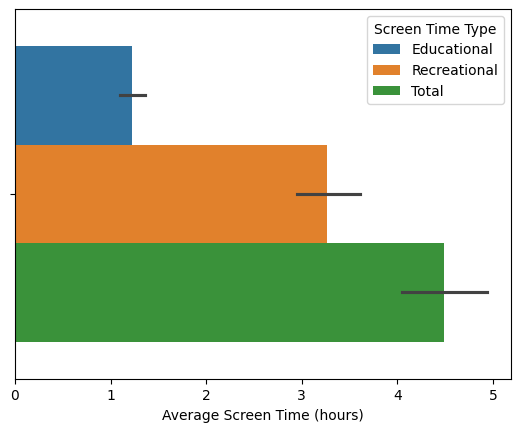

In [34]:
sns.barplot(data=data, x='Average Screen Time (hours)', hue='Screen Time Type');

In [35]:
data.groupby('Screen Time Type')['Average Screen Time (hours)'].sum().value_counts(normalize=True)

,proportion
Average Screen Time (hours),
80.98,0.333333
215.31,0.333333
296.33,0.333333


shows, 72% of the total screen time goes to recreational and 27% of the total goes to educational

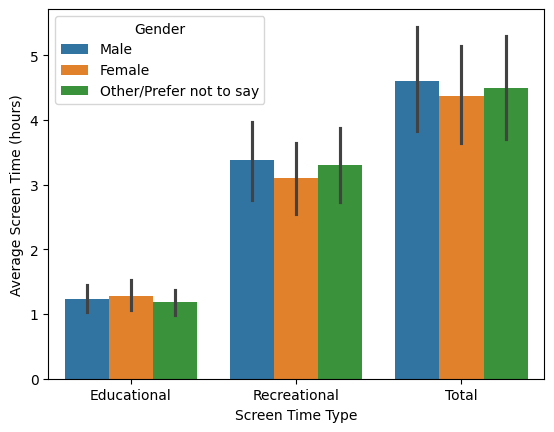

In [37]:
sns.barplot(data=data, x='Screen Time Type', y='Average Screen Time (hours)', hue='Gender');

In [41]:
filtered_data = data[(data['Gender'] == 'Female')]  # Filter the data first
result = filtered_data.groupby('Screen Time Type')['Average Screen Time (hours)'].sum().value_counts(normalize=True)
print(result)

Average Screen Time (hours)
28.01    0.333333
68.19    0.333333
96.22    0.333333
Name: proportion, dtype: float64


Female children spends 28% of time in educational screen type, 68% of time in recreational screen type

In [42]:
filtered_data_male = data[(data['Gender'] == 'Male')]  # Filter the data first
result = filtered_data_male.groupby('Screen Time Type')['Average Screen Time (hours)'].sum().value_counts(normalize=True)
print(result)

Average Screen Time (hours)
26.99     0.333333
74.31     0.333333
101.32    0.333333
Name: proportion, dtype: float64


Male children spends 27% of time in educational screen type, 74% of time in recreational screen type

In [43]:
filtered_data_others = data[(data['Gender'] == 'Other/Prefer not to say')]  # Filter the data first
result = filtered_data_others.groupby('Screen Time Type')['Average Screen Time (hours)'].sum().value_counts(normalize=True)
print(result)

Average Screen Time (hours)
25.98    0.333333
72.81    0.333333
98.79    0.333333
Name: proportion, dtype: float64


Other children spends 26% of time in educational screen type, 73% of time in recreational screen type

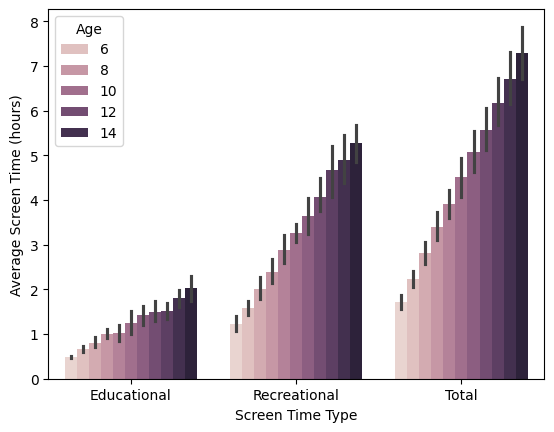

In [44]:
sns.barplot(data=data, x='Screen Time Type', y='Average Screen Time (hours)', hue='Age');

Looks like, as the age increases, screen time also increases. 14 years of children spends 25% more time on educational screen type and around 20% more time on recreational screen type

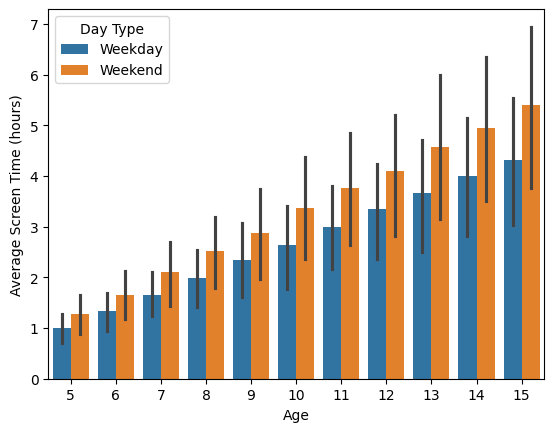

In [45]:
sns.barplot(data=data, x='Age', y='Average Screen Time (hours)', hue='Day Type');

Shows steep linear increase on screen time as the age increases.

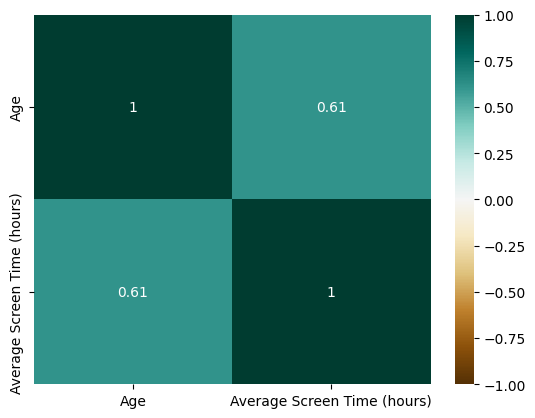

In [49]:
df = data[['Age', 'Average Screen Time (hours)']]
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG');

Shows, age is slightly proportional to Average screen time

Observations: The data represents children between the ages of 5 and 15 years.

1. On average, children spend 3 hours on screen.
2. The minimum screen time recorded among children is 45 minutes.
3. The maximum screen time recorded is 8 hours.
4. 75% of children spend an average of 4 hours on screen.
5. Female children have 10% lower screen time than male children, while other children have 5% lower screen time than male children.
6. Weekend screen time is 20% higher compared to weekday screen time.
7. Among female children, 28% of screen time is spent on educational learning, while 68% is spent on recreational activities.
8. Among male children, 27% of screen time is dedicated to educational learning, and 68% to recreational activities.
9. Among other children, 25% of screen time is spent on educational learning, and 73% on recreational activities.
10. 14-year-old children spend 25% more time on educational screen activities compared to 6-year-olds.
11. 14-year-olds also spend 20% more time on recreational screen activities than 6-year-olds.
12. The data clearly shows that screen time increases as children grow older.


Conclusion:

1. Overall Screen Usage: Children, on average, spend a significant amount of time (3-4 hours) on screens, indicating a high level of digital engagement.

2. Gender-Based Differences: Female children tend to have lower screen time than male children, suggesting possible differences in screen usage habits or parental regulations.Other children also exhibit slightly lower screen time than male children.

3. Weekend vs. Weekday Trends: Weekend screen time is 20% higher, implying that children are more likely to engage with screens for entertainment or education when they have free time.

4. Educational vs. Recreational Screen Time: Across all gender groups, a majority of screen time (68-73%) is spent on recreational activities, while educational usage remains below 30%. This highlights a need for better screen time management to ensure a more balanced use for learning and development.

5. Age-Related Screen Time Increase: Older children (14-year-olds) spend significantly more time on screens than younger ones (6-year-olds) for both educational (+25%) and recreational (+20%) purposes.


This suggests that as children grow older, their screen dependency increases, potentially due to schoolwork, social engagement, and entertainment preferences.
